- This notebook is for testing AL with FS

In [1]:
from utils import computeR2
from utils import computeR2_train
from utils import computeR2_train_self
from utils import computeR2_unlabel
from utils import getBatch
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import iGS
import GSx
import GSy
import Uncertainty
from Random import RandomSampling
from utils import get_input
from utils import get_input_all
from utils import normalized_data
from Save_data import save_data
from Plot_performance import plot_performance
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
myfile =r'Data/CombinedPSP.csv'
X, y = get_input_all(myfile)
X

ABS_f_D  DISS_wf10_D    STAT_e  STAT_n_D  STAT_n_A  STAT_CC_D  \
0     1.320169     0.087262 -0.006062  1.320161 -1.320161  -0.614829   
1     1.444165    -0.087533 -0.157241  1.444167 -1.444167  -0.779685   
2     1.409079    -0.275106 -0.307555  1.409071 -1.409071  -0.669781   
3     1.354663    -0.413892 -0.411220  1.354672 -1.354672  -0.669781   
4     1.249975    -0.668069 -0.592634  1.249969 -1.249969  -0.614829   
...        ...          ...       ...       ...       ...        ...   
1703 -1.478167    -0.494943 -0.586587 -1.478165  1.478165  -0.230167   
1704 -1.487525    -0.571953 -0.671247 -1.487524  1.487524  -0.340070   
1705 -1.502734    -0.688133 -0.757635 -1.502733  1.502733  -0.395022   
1706 -1.535498    -0.823785 -0.869075 -1.535489  1.535489  -0.559878   
1707 -1.579349    -0.937514 -0.958054 -1.579359  1.579359  -0.724733   

      STAT_CC_A  STAT_CC_D_An  STAT_CC_A_Ca  ABS_wf_D  ...  CT_f_e_conn  \
0      1.114886     -0.824615      0.924866  1.338172  ...     1.109499   
1      1.377647     -1.481384      0.352936  1.480020  ...    -0.020990   
2      0.852126     -0.824615      0.924866  1.431939  ...     1.120220   
3      0.852126     -0.824615      0.924866  1.373254  ...     1.158342   
4      0.589365     -0.496230      0.924866  1.312365  ...     1.533357   
...         ...           ...           ...       ...  ...          ...   
1703  -0.724438     -0.824615     -0.790924 -1.487375  ...    -1.052201   
1704  -0.724438     -0.824615     -0.790924 -1.510788  ...    -0.984381   
1705  -0.724438     -0.824615     -0.790924 -1.524357  ...    -0.947972   
1706  -0.724438     -1.153000     -0.790924 -1.638800  ...    -1.181102   
1707  -0.724438     -1.809769     -0.790924 -1.709496  ...    -1.440063   

      CT_f_conn_D_An  CT_f_conn_A_Ca  CT_e_conn  CT_e_D_An  CT_e_A_Ca  \
0           0.752834       -0.039552   1.454934   0.890408  -0.067287   
1           0.949669       -1.491452   0.064221   0.890408  -0.643667   
2           0.903150       -0.234910   0.979095   0.650772  -0.371898   
3           0.923195       -0.201134   0.845019   0.549332  -0.454824   
4           0.982160        0.097825   0.842390   0.380264  -0.535288   
...              ...             ...        ...        ...        ...   
1703       -1.063688        0.521964  -1.184528  -0.978161  -0.379287   
1704       -1.041872        0.521964  -1.174013  -0.972280  -0.466319   
1705       -1.050529        0.521964  -1.192415  -0.984042  -0.551709   
1706       -1.235330        0.521964  -1.400102  -1.097244  -0.663372   
1707       -1.345675        0.521964  -1.589386  -1.198684  -0.751225   

      CT_f_D_tort1  CT_f_A_tort1  CT_n_D_adj_An  CT_n_A_adj_Ca  
0        -1.242632     -0.543406      -1.214708      -0.819939  
1        -1.111462     -0.149221      -1.168102      -0.872776  
2        -0.869648     -0.186794      -0.981680      -0.582170  
3        -0.688194     -0.026125      -0.935074      -0.714264  
4        -0.397559     -0.030499      -0.538926      -1.136963  
...            ...           ...            ...            ...  
1703      1.093861      0.390183      -1.494342       0.580252  
1704      1.093861      0.430552      -1.494342       0.553834  
1705      1.093861      0.370893      -1.564251       0.474578  
1706      1.093861      0.534655      -2.426456       1.055789  
1707      1.093861      1.004627      -3.265358       1.848350  

[1708 rows x 21 columns]

In [4]:
runs=1
labeledPoolN=10

In [5]:
def feature_selection(X, y):
    feat_names = X.columns[:]
    rf = RandomForestRegressor(random_state=99)
    rf.fit(X, y)
    print("Features sorted by their score:")
    print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), reverse=True))

    plt.figure(figsize=(12,10))
    # plt.figure()
    importances=rf.feature_importances_
    x_plot = [2*i for i in range(len(importances))]
    indices=np.argsort(importances)
    # plt.title("Feature importances",fontsize=25)
    plt.barh(x_plot, importances[indices],height=1.8,color='#1f77b4')
    # ,height=1.8
    # If you want to define your own labels,
    # change indices to a list of labels on the following line.
    plt.xlabel("Feature importance score",fontsize=25)
    plt.ylabel("Features",fontsize=25)
    plt.yticks(x_plot, feat_names[indices],fontsize=20)
    plt.xticks(fontsize=20)
    # plt.savefig('Random forest all for new descriptor name raw.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    final_indices = get_final_indices(importances)

    return final_indices
    

In [6]:
def get_final_indices(importances_score):
    
    indices = np.argsort(importances_score)[::-1]  # Sort indices in descending order of importances
    cumulative_sum = 0.0
    selected_indices = []
    
    for index in indices:
        cumulative_sum += importances_score[index]
        selected_indices.append(index)
        if cumulative_sum > 0.98:
            break
            
    return selected_indices

Info.shape: (1, 1)
R2.shape (1, 1)
InfoRes [[0.45826429]]
Iteration: 0
DataPool shape before getBatch(): (1356, 22)
DataPool shape after getBatch(): (1355, 22)
Features sorted by their score:
[(0.2004, 'STAT_CC_D_An'), (0.1427, 'CT_f_A_tort1'), (0.1058, 'STAT_e'), (0.0982, 'CT_e_A_Ca'), (0.0817, 'STAT_CC_D'), (0.0738, 'DISS_wf10_D'), (0.0701, 'CT_f_e_conn'), (0.063, 'CT_f_conn_D_An'), (0.0339, 'DISS_f10_D'), (0.025, 'ABS_wf_D'), (0.0229, 'CT_e_conn'), (0.0202, 'CT_n_A_adj_Ca'), (0.0164, 'STAT_CC_A_Ca'), (0.0112, 'STAT_n_D'), (0.0109, 'CT_f_conn_A_Ca'), (0.0061, 'CT_f_D_tort1'), (0.0047, 'CT_n_D_adj_An'), (0.0044, 'STAT_n_A'), (0.0038, 'STAT_CC_A'), (0.0027, 'CT_e_D_An'), (0.002, 'ABS_f_D')]


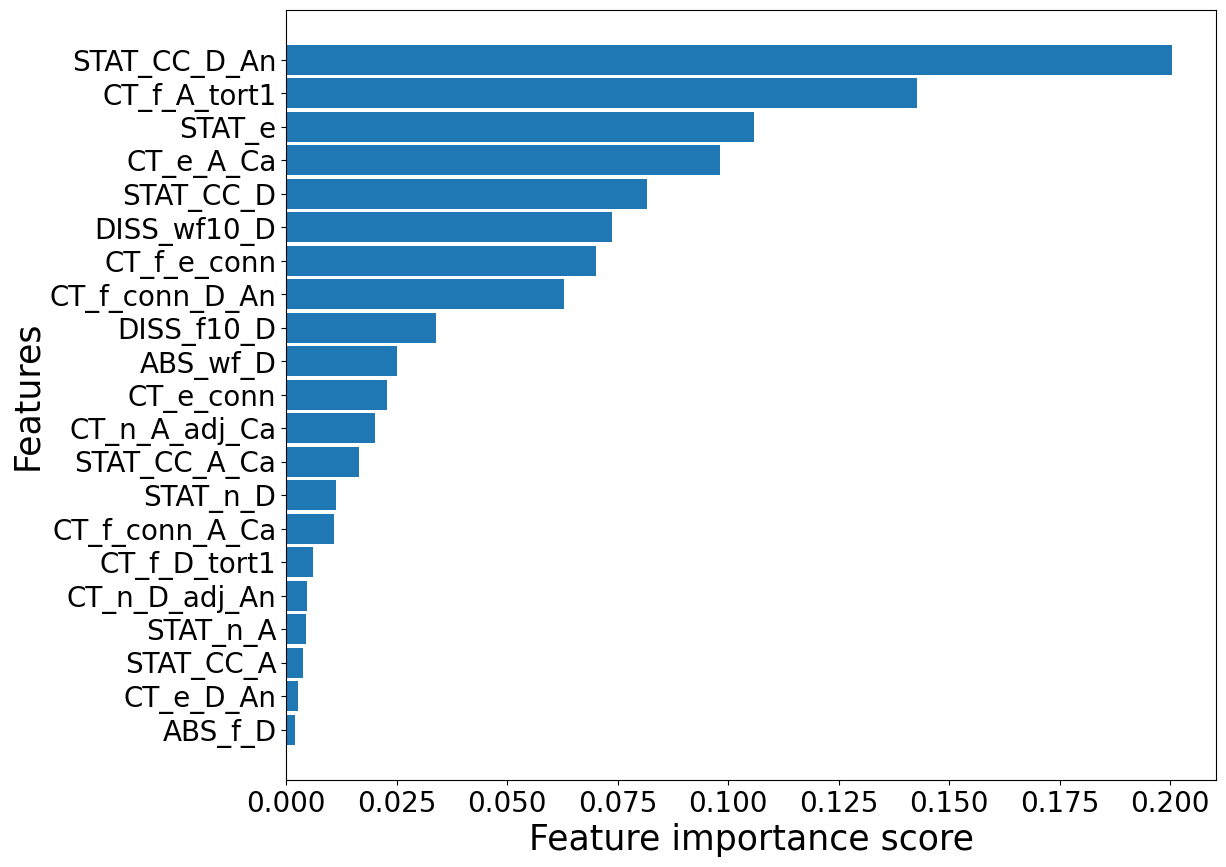

Iteration: 1
DataPool shape before getBatch(): (1355, 22)
DataPool shape after getBatch(): (1354, 22)
Iteration: 2
DataPool shape before getBatch(): (1354, 22)
DataPool shape after getBatch(): (1353, 22)
Iteration: 3
DataPool shape before getBatch(): (1353, 22)
DataPool shape after getBatch(): (1352, 22)
Iteration: 4
DataPool shape before getBatch(): (1352, 22)
DataPool shape after getBatch(): (1351, 22)
Iteration: 5
DataPool shape before getBatch(): (1351, 22)
DataPool shape after getBatch(): (1350, 22)
Iteration: 6
DataPool shape before getBatch(): (1350, 22)
DataPool shape after getBatch(): (1349, 22)
Iteration: 7
DataPool shape before getBatch(): (1349, 22)
DataPool shape after getBatch(): (1348, 22)
Iteration: 8
DataPool shape before getBatch(): (1348, 22)
DataPool shape after getBatch(): (1347, 22)
Iteration: 9
DataPool shape before getBatch(): (1347, 22)
DataPool shape after getBatch(): (1346, 22)
Iteration: 10
DataPool shape before getBatch(): (1346, 22)
DataPool shape after ge

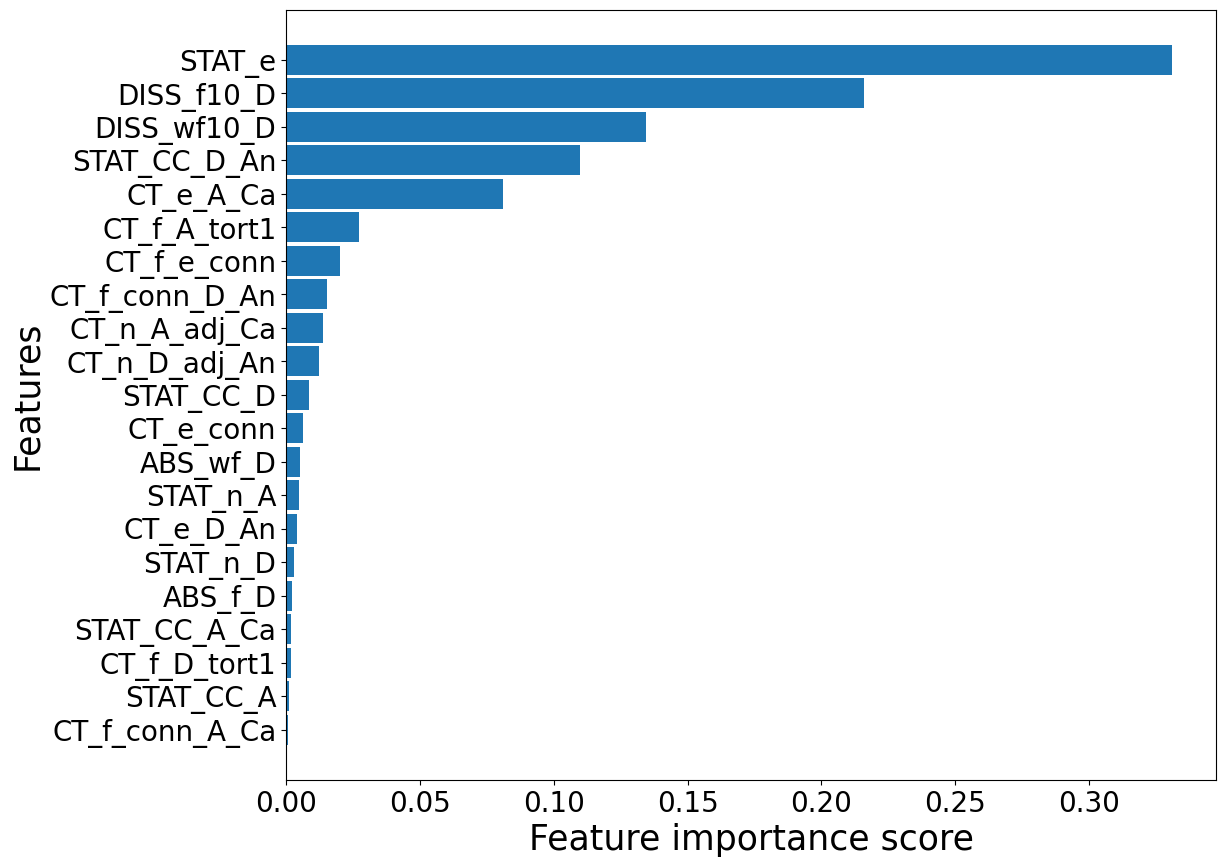

Iteration: 11
DataPool shape before getBatch(): (1345, 22)
DataPool shape after getBatch(): (1344, 22)
Iteration: 12
DataPool shape before getBatch(): (1344, 22)
DataPool shape after getBatch(): (1343, 22)
Iteration: 13
DataPool shape before getBatch(): (1343, 22)
DataPool shape after getBatch(): (1342, 22)
Iteration: 14
DataPool shape before getBatch(): (1342, 22)
DataPool shape after getBatch(): (1341, 22)
Iteration: 15
DataPool shape before getBatch(): (1341, 22)
DataPool shape after getBatch(): (1340, 22)
Iteration: 16
DataPool shape before getBatch(): (1340, 22)
DataPool shape after getBatch(): (1339, 22)
Iteration: 17
DataPool shape before getBatch(): (1339, 22)


IndexError: positional indexers are out-of-bounds

In [8]:
R2Smooth = []
MSEsmooth = []
MAEsmooth = []
Infosmooth = []
R2_train = []
R2_trainS = []
SelectData = []
freq=10
fs=True
fs_score=0.98

np.random.seed(0) # set the same random choice for initial codition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dataPool = pd.concat([X_train, y_train], axis=1)
# Reset the index to ensure the indices are continuous integers
dataPool = dataPool.reset_index(drop=True)
SelectIdx=np.random.choice(dataPool.shape[0], labeledPoolN, replace=False)
dataPoolL = dataPool.iloc[SelectIdx, :]
dataPool = dataPool.drop(SelectIdx)

R2Res = np.empty((0,1), float)
MSERes = np.empty((0,1), float)
MAERes = np.empty((0,1), float)
InfoRes = np.empty((0,1), float)
R2Res_t = np.empty((0,1), float)
R2Res_tS = np.empty((0,1), float)

R2, Model, MSEstart, MAEstart = computeR2(dataPoolL, X_test, y_test, fs=True)
R2_t, Model_t, MSEstart_t, _ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
R2_tS, Model_tS, MSEstart_tS, _ = computeR2_train_self(dataPoolL, fs=True)
Info = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)
print(f'Info.shape: {Info.shape}')
print(f'R2.shape {R2.shape}')

R2Res = np.append(R2Res, R2, axis=0)
MSERes = np.append(MSERes, MSEstart, axis=0)
MAERes = np.append(MAERes, MAEstart, axis=0)
InfoRes = np.append(InfoRes, Info, axis=0)
print(f'InfoRes {InfoRes}')

R2Res_t = np.append(R2Res_t, R2_t, axis=0)
R2Res_tS = np.append(R2Res_tS, R2_tS, axis=0)

for i in range(21):
    print(f"Iteration: {i}")
    print(f"DataPool shape before getBatch(): {dataPool.shape}")
    
    dataBatch, dataPool = getBatch(dataPool, 1, fs=True)

    print(f"DataPool shape after getBatch(): {dataPool.shape}")
    # dataPoolL = np.vstack((dataPoolL, dataBatch))
    dataPoolL = pd.concat([dataPoolL, dataBatch], axis=0, ignore_index=True)

    cR2, Model, cMSE, cMAE = computeR2(dataPoolL, X_test, y_test, fs=True)
    cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
    cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL, fs=True)
    cInfo = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)

    R2Res = np.append(R2Res, cR2, axis=0)
    MSERes = np.append(MSERes, cMSE, axis=0)
    MAERes = np.append(MAERes, cMAE, axis=0)
    InfoRes = np.append(InfoRes, cInfo, axis=0)
    R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
    R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)

    if i % freq ==0:
        indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1])
        dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
        dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

        cR2, Model, cMSE, cMAE = computeR2(dataPoolL_fs, X_test.iloc[:,indices], y_test, fs=True)
        cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL_fs, X_train.iloc[:,indices], y_train, fs=True)
        cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL_fs, fs=True)
        cInfo = computeR2_unlabel(dataPool_fs, dataPoolL_fs, Model, fs=True)
    
        R2Res = np.append(R2Res, cR2, axis=0)
        MSERes = np.append(MSERes, cMSE, axis=0)
        MAERes = np.append(MAERes, cMAE, axis=0)
        InfoRes = np.append(InfoRes, cInfo, axis=0)
        R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
        R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)
        
        # Recover feature process?

 
    
R2Smooth.append(R2Res)
MSEsmooth.append(MSERes)
MAEsmooth.append(MAERes)
Infosmooth.append(InfoRes)
R2_train.append(R2Res_t)
R2_trainS.append(R2Res_tS)
SelectData.append(dataPoolL)

In [14]:
indices

[2, 10, 1, 7, 16, 18, 11, 12, 20, 19, 5, 14, 9]

In [20]:
X_test.iloc[:,indices]

STAT_e  DISS_f10_D  DISS_wf10_D  STAT_CC_D_An  CT_e_A_Ca  \
1544  0.657395    1.012641     1.027544      0.488924   0.876105   
6    -0.741221   -0.758797    -0.867697     -0.167845  -0.660088   
251  -0.958054   -1.131289    -1.122853     -0.167845  -1.009036   
838   0.188310    0.666008     0.386133      0.817309   0.335851   
310   1.183496    1.106593     1.190566      1.145694   1.144590   
...        ...         ...          ...           ...        ...   
619   0.539908    0.892261     0.684492      0.488924   0.633894   
1566 -0.079492    0.353690     0.259166     -0.496230   0.124840   
993   2.221011    1.130230     1.805784      1.802463   2.345793   
315   0.534724    0.922540     0.658837      0.817309   0.519768   
582  -1.129966   -1.516653    -1.368424     -0.824615  -1.091142   

      CT_f_A_tort1  CT_f_e_conn  CT_f_conn_D_An  CT_n_A_adj_Ca  CT_n_D_adj_An  \
1544     -0.172791    -1.349026       -1.280313       1.452069      -0.911771   
6         0.095951     2.469796        1.462628      -1.691755       0.183462   
251       2.005515     2.181712        2.020313       0.104716       0.416490   
838      -1.069470    -0.636982       -0.786001       0.289647       2.001083   
310      -1.341002     0.903061        0.372116      -0.529333      -0.538926   
...            ...          ...             ...            ...            ...   
619      -0.892637     0.712634        0.224325      -0.925613      -0.119475   
1566      0.134686    -1.166591       -1.158908       1.504907      -1.680765   
993      -1.395740    -1.051584       -1.027580      -0.582170      -0.748651   
315      -1.128893     0.853197        0.411866      -0.185890       0.486399   
582       1.048872     1.219320        1.141671       1.504907      -0.026263   

      STAT_CC_D  CT_e_conn  ABS_wf_D  
1544   1.253531  -1.026792 -1.723597  
6     -0.724733   1.231474  1.538515  
251   -0.779685   0.555835  1.322665  
838    0.044592  -0.322234  0.256414  
310    0.044592   3.016529  1.164550  
...         ...        ...       ...  
619    0.099544   1.786182  0.546609  
1566   0.209447  -1.066226 -1.708280  
993    1.858001   0.140461  0.064130  
315   -0.065312   1.972837  1.176713  
582   -0.834637  -0.301202  0.438019  

[342 rows x 13 columns]

In [32]:
importances = [0.2, 0.3, 0.1, 0.25, 0.15]

In [17]:
dataPool.shape[0]

1349

In [19]:
SelectIdx=np.random.choice(dataPool.shape[0], 1, replace=False)
SelectIdx

array([1010])

In [21]:
dataBatch = dataPool.iloc[SelectIdx, :]
dataPool = dataPool.drop(SelectIdx)

In [29]:
dataPool

ABS_f_D  DISS_wf10_D    STAT_e  STAT_n_D  STAT_n_A  STAT_CC_D  \
0     1.481596    -0.444895 -0.522660  1.481603 -1.481603  -0.999492   
1    -1.416170     0.160942 -0.094178 -1.416162  1.416162   0.264399   
2    -0.872166    -0.401166 -0.439728 -0.872173  0.872173  -0.230167   
3    -1.198573     0.039940 -0.171063 -1.198567  1.198567   0.044592   
4    -0.767478     0.730171  0.469070 -0.767470  0.767470   0.649062   
...        ...          ...       ...       ...       ...        ...   
1361  0.264950     0.662647  0.425012  0.264939 -0.264939   0.154496   
1362 -0.379666     0.216062  0.009487 -0.379658  0.379658   0.154496   
1363 -1.299755     0.510071  0.264331 -1.299760  1.299760   0.758965   
1364  0.121623    -1.000525 -0.870803  0.121630 -0.121630  -0.614829   
1365  0.425785    -1.465275 -1.129966  0.425796 -0.425796  -0.779685   

      STAT_CC_A  STAT_CC_D_An  STAT_CC_A_Ca  ABS_wf_D  ...  CT_f_conn_D_An  \
0      1.903168     -1.481384      0.924866  1.419548  ...        1.882087   
1     -0.724438     -0.167845     -0.790924 -1.373121  ...       -0.779236   
2     -0.724438     -0.496230     -0.790924 -0.660919  ...       -0.427587   
3     -0.724438     -0.824615     -0.790924 -1.280495  ...       -1.276394   
4     -0.724438      0.817309     -0.790924 -0.774755  ...       -0.813551   
...         ...           ...           ...       ...  ...             ...   
1361  -0.461677      1.145694     -0.790924  0.286213  ...       -0.777186   
1362  -0.461677      0.488924     -0.218994 -0.406605  ...       -0.982134   
1363  -0.724438      0.488924     -0.790924 -1.258108  ...       -0.895074   
1364  -0.461677     -0.824615     -0.218994  0.194042  ...        0.270427   
1365  -0.461677     -1.153000     -0.218994  0.030188  ...        0.059789   

      CT_f_conn_A_Ca  CT_e_conn  CT_e_D_An  CT_e_A_Ca  CT_f_D_tort1  \
0          -3.286218  -0.477342   1.149155  -1.307079     -1.428046   
1           0.521964  -0.706060  -0.717943   0.110061      1.093861   
2           0.521964  -0.548323  -0.628264  -0.238887      1.093861   
3           0.521964  -1.310718  -1.050199   0.028777      1.093861   
4           0.521964  -0.301202  -0.501830   0.660168      0.434726   
...              ...        ...        ...        ...           ...   
1361        0.472372  -0.169755  -0.428322   0.552610      0.730024   
1362        0.521964  -0.603531  -0.665018   0.194630      0.744891   
1363        0.521964  -0.614047  -0.672368   0.471325      1.093861   
1364        0.521964  -0.201302  -0.425382  -0.674046      0.116443   
1365        0.521964  -0.585129  -0.640025  -0.922826     -0.200467   

      CT_f_A_tort1  CT_n_D_adj_An  CT_n_A_adj_Ca       JSC  
0         2.201719       0.579610       0.765183  0.289684  
1        -0.331322       0.463096      -0.080215  0.318276  
2         0.596557       1.162181       1.478488  0.315967  
3        -0.824287      -2.053610      -0.793520 -1.077508  
4        -0.707634      -0.515623      -0.238727  0.259214  
...            ...            ...            ...       ...  
1361     -1.234022       1.395210      -0.080215  1.446512  
1362     -0.471638       0.253371      -0.555752  0.362595  
1363     -0.831673       1.045667      -1.004869  0.274757  
1364      0.419381       1.208787      -1.295475 -1.021155  
1365      1.047325      -1.074891      -0.027378 -1.402147  

[1348 rows x 22 columns]